In [ ]:
import numpy as np
from memqoop import compilation
%load_ext autoreload
%autoreload 2
def generate_points_on_sphere(d, k):
    vecs = np.random.randn(k, d)
    vecs /= np.linalg.norm(vecs, axis=1, keepdims=True)
    return vecs
# vecs = generate_points_on_sphere(32, 4)
# costs, thetass, i = compilation.compilation(
# 				state = vecs[0], 
# 				thetas = None,
# 				steps = 200,
# 				num_layers = 5
# 			)

xxxxx
None
(75,)
Achieved error threshold at step 117


In [ ]:
from memqoop import memcompiler
import numpy as np
import pandas as pd
import os
num_qubits = 2
num_repeats = 2


for k in range(2,5):
	cost_with_mems = []
	cost_without_mems = []
	i_with_mems = []
	i_without_mems = []
	mem_compilation = memcompiler.MemCompilation(num_qubits)
	mem_compilation.gen_vecs(k)
	mem_compilation.compile_vecs()
		
	for i in range(num_repeats):
		print(f"num_qubits: {num_qubits}, k: {k}, i: {i}")

		v = np.random.randn(2**num_qubits)
		v /= np.linalg.norm(v)
		costs, thetass, i = mem_compilation.compile_v_with_mem(v)
		cost_with_mems.append(costs[-1])
		i_with_mems.append(i)
		
		costs, thetass, i = mem_compilation.compile_v_without_mem(v)
		cost_without_mems.append(costs[-1])
		i_without_mems.append(i)
	records = {
		"num_qubits": num_qubits,
		"k": k,
		"cost_with_mems": np.mean(cost_with_mems),
		"cost_without_mems": np.mean(cost_without_mems),
		"i_with_mems": np.mean(i_with_mems),
		"i_without_mems": np.mean(i_without_mems)
	}
	file_name = "records.csv"
	if os.path.exists(file_name):
		pd.DataFrame([records]).to_csv(file_name, mode='a', header=False, index=False)
	else:
		pd.DataFrame([records]).to_csv(file_name, index=False)

num_qubits: 2, k: 2, i: 0
Achieved error threshold at step 74
Achieved error threshold at step 66
Achieved error threshold at step 69
Achieved error threshold at step 63
num_qubits: 2, k: 2, i: 1
Achieved error threshold at step 63
Achieved error threshold at step 56
Achieved error threshold at step 58
Achieved error threshold at step 76
num_qubits: 2, k: 3, i: 0
Achieved error threshold at step 61
Achieved error threshold at step 89
Achieved error threshold at step 87
Achieved error threshold at step 57
Achieved error threshold at step 71
num_qubits: 2, k: 3, i: 1
Achieved error threshold at step 56
Achieved error threshold at step 54
Achieved error threshold at step 46
Achieved error threshold at step 45
Achieved error threshold at step 83
num_qubits: 2, k: 4, i: 0
Achieved error threshold at step 56
Achieved error threshold at step 55
Achieved error threshold at step 53
Achieved error threshold at step 73
Achieved error threshold at step 62
Achieved error threshold at step 51
num_qu

Text(0, 0.5, 'Compilation Cost')

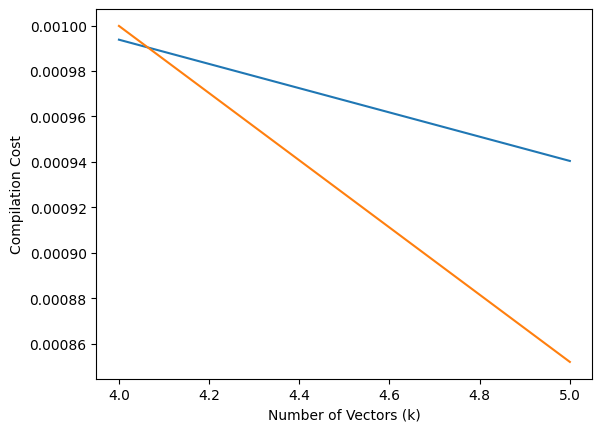

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(4, 6), cost_with_memss[0], label='With Memory')
plt.plot(range(4, 6), cost_without_memss[0], label='Without Memory')
plt.xlabel('Number of Vectors (k)')
plt.ylabel('Compilation Cost')
